# Análisis Exploratorio de Datos

In [6]:
# Agregamos la raíz del proyecto al path y para importar los paquetes de src 
import sys
import os

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

# Importamos librerías necesarias
import src.data.preprocess as pp
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Cargamos el dataset limpio
df = pp.preprocesar_datos()

Iniciando preprocesamiento...
Registros iniciales: 30000
Registros eliminados por inconsistencias de deuda: 1739
Registros eliminados por inconsistencias factura-pago: 2769
Registros finales: 25492
Preprocesamiento completado.


In [4]:
print(df.shape)
df.head()

(25492, 9)


,limite_credito,genero,educacion,estado_civil,edad,meses_deuda_sep,pago_sep,factura_sep,default_oct
0,20000,2,2,1,24,-2,0,0,1
2,90000,2,2,2,34,0,15549,5000,0
3,50000,2,2,1,37,0,29547,1000,0
4,50000,1,2,1,57,0,19131,679,0
5,50000,1,1,2,37,0,20024,800,0


### Análisis de cada variable

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25492 entries, 0 to 29999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   limite_credito   25492 non-null  int64
 1   genero           25492 non-null  int64
 2   educacion        25492 non-null  int64
 3   estado_civil     25492 non-null  int64
 4   edad             25492 non-null  int64
 5   meses_deuda_sep  25492 non-null  int64
 6   pago_sep         25492 non-null  int64
 7   factura_sep      25492 non-null  int64
 8   default_oct      25492 non-null  int64
dtypes: int64(9)
memory usage: 1.9 MB


C:\Users\matia\AppData\Local\Temp\ipykernel_2008\2804159313.py:43: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30)
C:\Users\matia\AppData\Local\Temp\ipykernel_2008\2804159313.py:43: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30)
C:\Users\matia\AppData\Local\Temp\ipykernel_2008\2804159313.py:43: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30)
C:\Users\matia\AppData\Local\Temp\ipykernel_2008\2804159313.py:43: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_

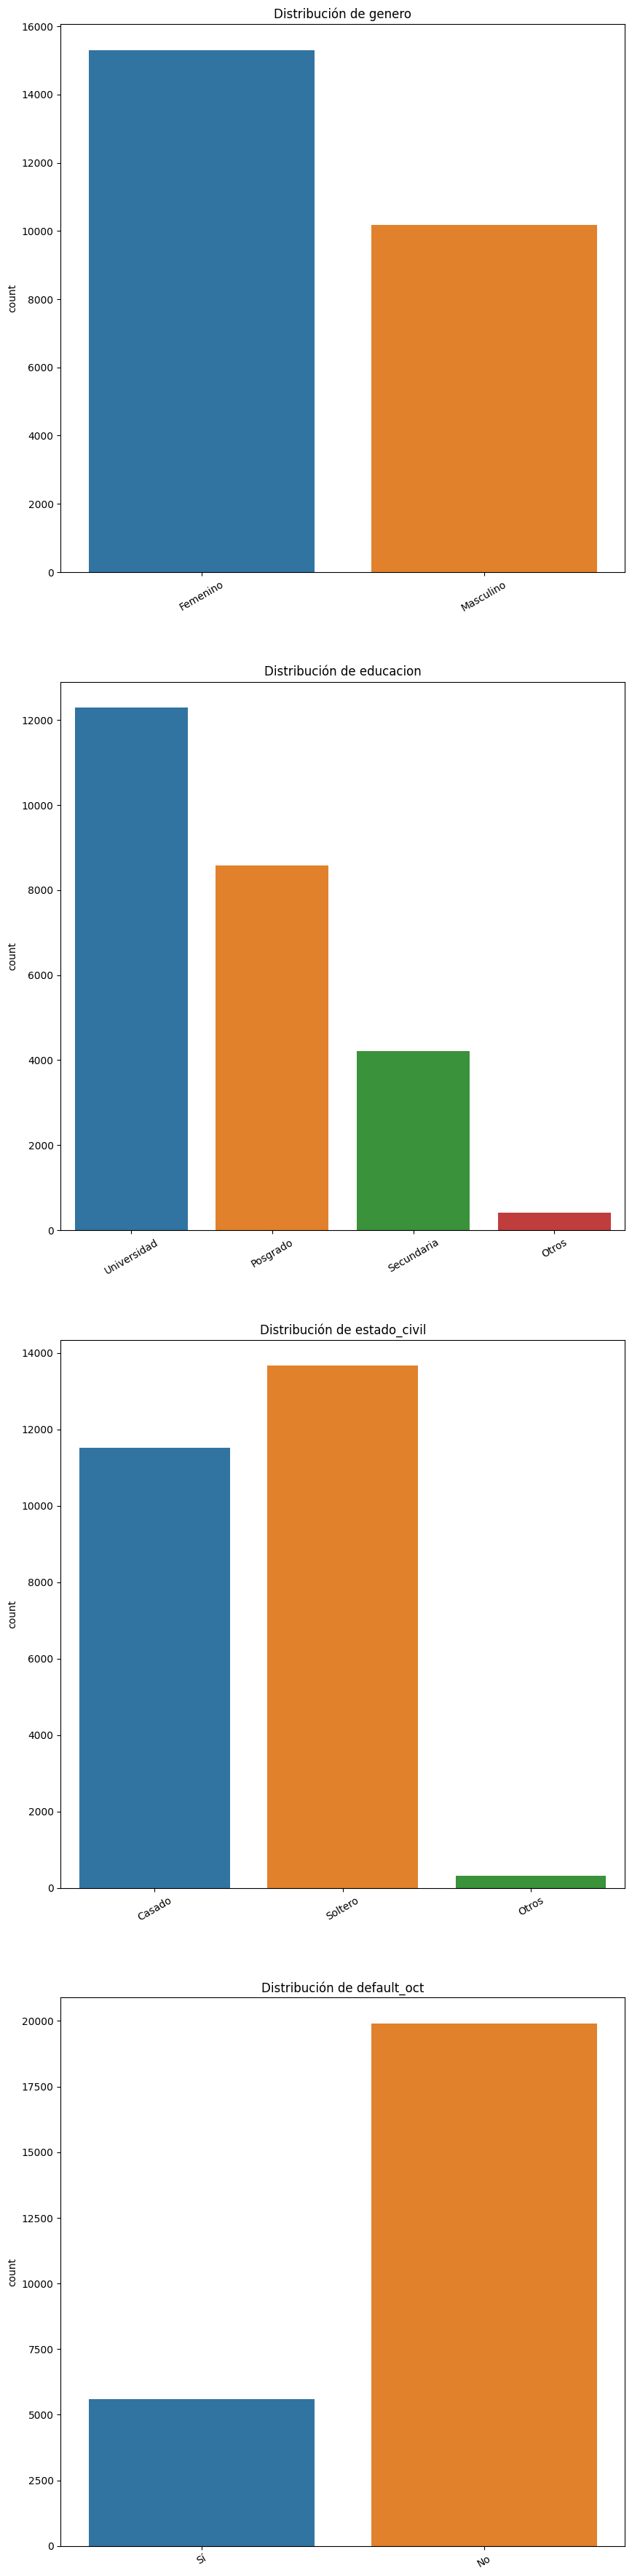

In [15]:
# Guardamos las variables categóricas para generar gráficos de barras y observar la distribución
col_cat = ['genero', 'educacion', 'estado_civil', 'default_oct']

# Creamos una copia del dataframe para mapear las categorías con los numeros
df_vis = df.copy()

# Definimos los mapeos
diccionarios_mapeo = {
    'genero': {
        1: 'Masculino', 
        2: 'Femenino'
    },
    'educacion': {
        1: 'Posgrado', 
        2: 'Universidad', 
        3: 'Secundaria', 
        4: 'Otros'
    },
    'estado_civil': {
        1: 'Casado', 
        2: 'Soltero', 
        3: 'Otros'
    },
    'default_oct': {
        0: 'No', 
        1: 'Sí'
    }
}

# Aplicamos el mapeo al dataset auxiliar
for col in col_cat:
    if col in diccionarios_mapeo:
        df_vis[col] = df_vis[col].map(diccionarios_mapeo[col])

# Gráficos de barras
fig, ax = plt.subplots(nrows=len(col_cat), ncols=1, figsize=(10,45))
#fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(col_cat):
    sns.countplot(x=col, data=df_vis, ax=ax[i], hue=col)
    ax[i].set_title(f'Distribución de {col}')
    ax[i].set_xlabel('')
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30)

plt.show()

In [ ]:
import numpy as np

In [ ]:
print(f'Mediana edad: {np.median(df['edad'])}\nMedia edad: {np.mean(df['edad']):.2f}')

In [ ]:
plt.scatter(x=df['edad'], y=df['limite_credito'])